Text(0, 0.5, 'Population Density')

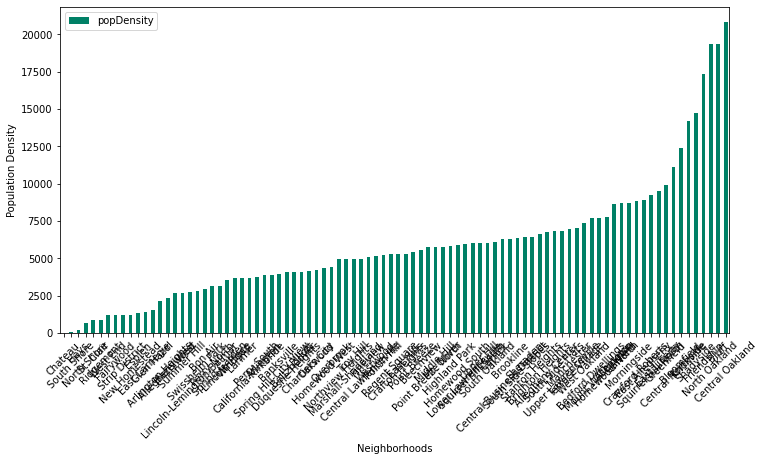

In [8]:

import pandas as pd
import geopandas
%matplotlib inline

area = pd.read_csv("neighborhoods.csv")
population = pd.read_csv("total-population.csv")

area1 = area[["hood", "sqmiles"]].rename(columns={'hood': 'Neighborhood'})
pop1 = population[["Neighborhood", "Estimate; Total"]]

density = pd.merge(pop1, area1, on='Neighborhood')
density['popDensity'] = density['Estimate; Total'] / density['sqmiles']
density = density.sort_values(by='popDensity', ascending=True)

density.head(10)


chart = density.plot.bar(x="Neighborhood", y="popDensity", colormap="summer", rot=45, figsize=(12,6))
# chart.set_title("Population Density by Neighborhood")
chart.set_xlabel("Neighborhoods")
chart.set_ylabel("Population Density")


# search = density[density['Neighborhood'] == 'South Side Slopes']
# print(search)


parkmap = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
parkmap = parkmap.drop(columns=['objectid', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10',
                                'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
                                'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
                                'fid_neighb', 'area', 'perimeter', 'neighbor_', 'neighbor_i',
                                'hood_no', 'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors',
                                'shape_le_1', 'shape_ar_1', 'page_numbe', 'plannerass', 'created_us',
                                'created_da', 'last_edite', 'last_edi_1', 'Shape__Are', 'Shape__Len'])
parkmap.rename(columns={'hood': 'Neighborhood'}, inplace=True)


dense = parkmap.merge(density, how="left", on="Neighborhood")


dense.plot(
    column="popDensity",
    cmap="summer_r",
    edgecolor="white",
    legend=True,
    legend_kwds={'label': "Population Density"},
    figsize=(15, 10),
)
